In [1]:
#importing main modules
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading the dataset
df = pd.read_csv("Crop_recommendation.csv")
print(df.head())

# #checking the shape of the dataset
# print(df.shape)


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [ ]:
# #overview of dataset columns
df.describe()

In [ ]:
df.info()

In [ ]:
# #num of values/observations for each class
df["label"].value_counts()

In [ ]:
df['label'].unique()

In [ ]:
# #checking for duplicate values
df.loc[df.duplicated()]

In [ ]:
# #checking for null values
df.isnull().sum()

In [ ]:
#checking outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.show()

In [ ]:
# checking distribution for each feature
for column in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column], bins=100)
    plt.title(f'Distribution of {column}')
    plt.show()

# Ideal transformations for features :
# N: Robust Scaler
# P' : Robust Scaler
# K: Robust Scaler
# Temp, ph: Standard Scaler
# Humidity, Rainfall: Log transformation

In [ ]:
# for column in df1.columns:
#     plt.figure(figsize=(5, 3))
#     sns.kdeplot(df[column])
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [ ]:
# for column in df.columns:
#     plt.figure(figsize=(10,6))
#     sns.scatterplot(data=df, x=column, y='label', hue='label')
#     plt.title(f'Distribution of {column}')
#     plt.show()

In [ ]:
# #checking relations for features with each other
# plt.figure(figsize=(10, 6))
# sns.pairplot(df, hue='label')
# plt.show()


In [ ]:
# #checking correlation
# df1= df.drop('label', axis=1)
# corr = df1.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# df.columns.unique()

# le = LabelEncoder()
# df['label']= le.fit_transform(df['label']) 
# df['label'].unique()


In [ ]:
# #checking correlation
# corr = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

In [ ]:
# df['rain-ph'] = df['rainfall'] - df['ph']
# df.head()
# corr = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()



In [3]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\bhanu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:

# le = LabelEncoder()
# df['label']= le.fit_transform(df['label']) 
# df['label'].unique()




In [ ]:
# df['label'] = df['label'].map({
# 'rice' : 0,          
# 'maize' : 1,        
# 'jute' : 2,          
# 'cotton' : 3,      
# 'coconut' : 4,       
# 'papaya' : 5,        
# 'orange' : 6,        
# 'apple'  : 7,         
# 'muskmelon' : 8,    
# 'watermelon'  : 9,   
# 'grapes' : 10,       
# 'mango'  :11,       
# 'banana'  : 12,      
# 'pomegranate'  : 13, 
# 'lentil'   :14,     
# 'blackgram' : 15,    
# 'mungbean'  : 16,    
# 'mothbeans'  : 17,   
# 'pigeonpeas'  : 18,  
# 'kidneybeans'  : 19, 
# 'chickpea' : 20,   
# 'coffee' : 21      
# })

In [ ]:
df.head()

In [4]:
#splitting the data, such that 20% from each class goes into 
from sklearn.model_selection import train_test_split

x = df.drop(columns=['label'])
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# for col in x_train.columns:
#     plt.figure(figsize=(10, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x_train[col], kde=True)
#     plt.title(f'{col} Distribution in Training Set')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x_test[col], kde=True)
#     plt.title(f'{col} Distribution in Test Set')
    
#     plt.show()

In [5]:
# from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
# from sklearn.pipeline import Pipeline


# NPK_cols = ['N','P', 'K']
# temp_ph_cols = ['temperature', 'ph']
# rainfall_humidity_cols = ['rainfall', 'humidity']

# transformed_columns = ['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']

# x_train_transformed_df1 = pd.DataFrame(x_train_combined, columns=transformed_columns)




# Apply RobustScaler to N, P, K
# robust_scaler = RobustScaler()


# x_train_NPK = robust_scaler.fit_transform(x_train[NPK_cols])
# x_test_NPK = robust_scaler.transform(x_test[NPK_cols])

# Create new DataFrames from the transformed arrays
# x_train[NPK_cols] = pd.DataFrame(x_train_NPK, columns=NPK_cols, index=x_train.index)
# x_test[NPK_cols] = pd.DataFrame(x_test_NPK, columns=NPK_cols, index=x_test.index)

# Apply StandardScaler to temperature and ph
# standard_scaler_temp_ph = StandardScaler()
# x_train_temp_ph = standard_scaler_temp_ph.fit_transform(x_train[temp_ph_cols])
# x_test_temp_ph = standard_scaler_temp_ph.transform(x_test[temp_ph_cols])

# Create new DataFrames from the transformed arrays
# x_train[temp_ph_cols] = pd.DataFrame(x_train_temp_ph, columns=temp_ph_cols, index=x_train.index)
# x_test[temp_ph_cols] = pd.DataFrame(x_test_temp_ph, columns=temp_ph_cols, index=x_test.index)

# Apply log transformation to rainfall and humidity
# x_train[rainfall_humidity_cols] = np.log1p(x_train[rainfall_humidity_cols])
# x_test[rainfall_humidity_cols] = np.log1p(x_test[rainfall_humidity_cols])

# Combine the transformed features back into single datasets
# x_train_combined = x_train[NPK_cols + temp_ph_cols + rainfall_humidity_cols]
# x_test_combined = x_test[NPK_cols + temp_ph_cols + rainfall_humidity_cols]


# Apply a final StandardScaler to the combined datasets
final_scaler = StandardScaler()
x_train_transformed = final_scaler.fit_transform(x_train)
x_test_transformed = final_scaler.transform(x_test)



In [6]:
transformed_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# N   P   K  temperature   humidity        ph    rainfall


x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=transformed_columns)
x_test_transformed_df = pd.DataFrame(x_test_transformed, columns=transformed_columns)


# plt.figure(figsize=(10, 5))
    
# plt.subplot(1, 2, 1)
# sns.histplot(x_train['N'], kde=True)
# plt.title(' Distribution in Training Set')
    

# plt.figure(figsize=(10, 5))
    
# plt.subplot(1, 2, 1)
# sns.histplot(x_train['P'], kde=True)
# plt.title(' Distribution in Training Set')
    

# plt.figure(figsize=(10, 5))
    
# plt.subplot(1, 2, 1)
# sns.histplot(x_train['K'], kde=True)
# plt.title(' Distribution in Training Set')


In [ ]:
# transformed_columns = ['N', 'P', 'K', 'temperature', 'ph', 'rainfall', 'humidity']

# x_train_transformed_df = pd.DataFrame(x_train_transformed, columns=transformed_columns)

# for col in x_train_transformed_df.columns:
#     plt.figure(figsize=(10, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x_train[col], kde=True)
#     plt.title(f'{col} Distribution Original')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x_train_transformed_df[col], kde=True)
#     plt.title(f'{col} Distribution Transformed')
    
#     plt.show()

In [ ]:
# for col in x_test_transformed_df.columns:
#     plt.figure(figsize=(10, 5))
    
#     plt.subplot(1, 2, 1)
#     sns.histplot(x_test[col], kde=True)
#     plt.title(f'{col} Distribution Original')
    
#     plt.subplot(1, 2, 2)
#     sns.histplot(x_test_transformed_df[col], kde=True)
#     plt.title(f'{col} Distribution Transformed')
    
#     plt.show()

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, balanced_accuracy_score

In [121]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt.fit(x_train, y_train) 

y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9795454545454545


In [122]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_train_poly = poly.fit_transform(x_train_transformed)
x_test_poly = poly.transform(x_test_transformed)

# N   P   K  temperature   humidity        ph    rainfall

feature_names = poly.get_feature_names_out(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

x_train_poly_df = pd.DataFrame(x_train_poly, columns= feature_names)
x_test_poly_df = pd.DataFrame(x_test_poly, columns= feature_names)

x_train_poly_df.columns.unique()



Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N P',
       'N K', 'N temperature', 'N humidity', 'N ph', 'N rainfall', 'P K',
       'P temperature', 'P humidity', 'P ph', 'P rainfall', 'K temperature',
       'K humidity', 'K ph', 'K rainfall', 'temperature humidity',
       'temperature ph', 'temperature rainfall', 'humidity ph',
       'humidity rainfall', 'ph rainfall'],
      dtype='object')

In [123]:
dt_poly = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_poly.fit(x_train_poly_df, y_train) 

y_pred_poly = dt_poly.predict(x_test_poly_df)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy: {accuracy_poly}')

Accuracy: 0.9772727272727273


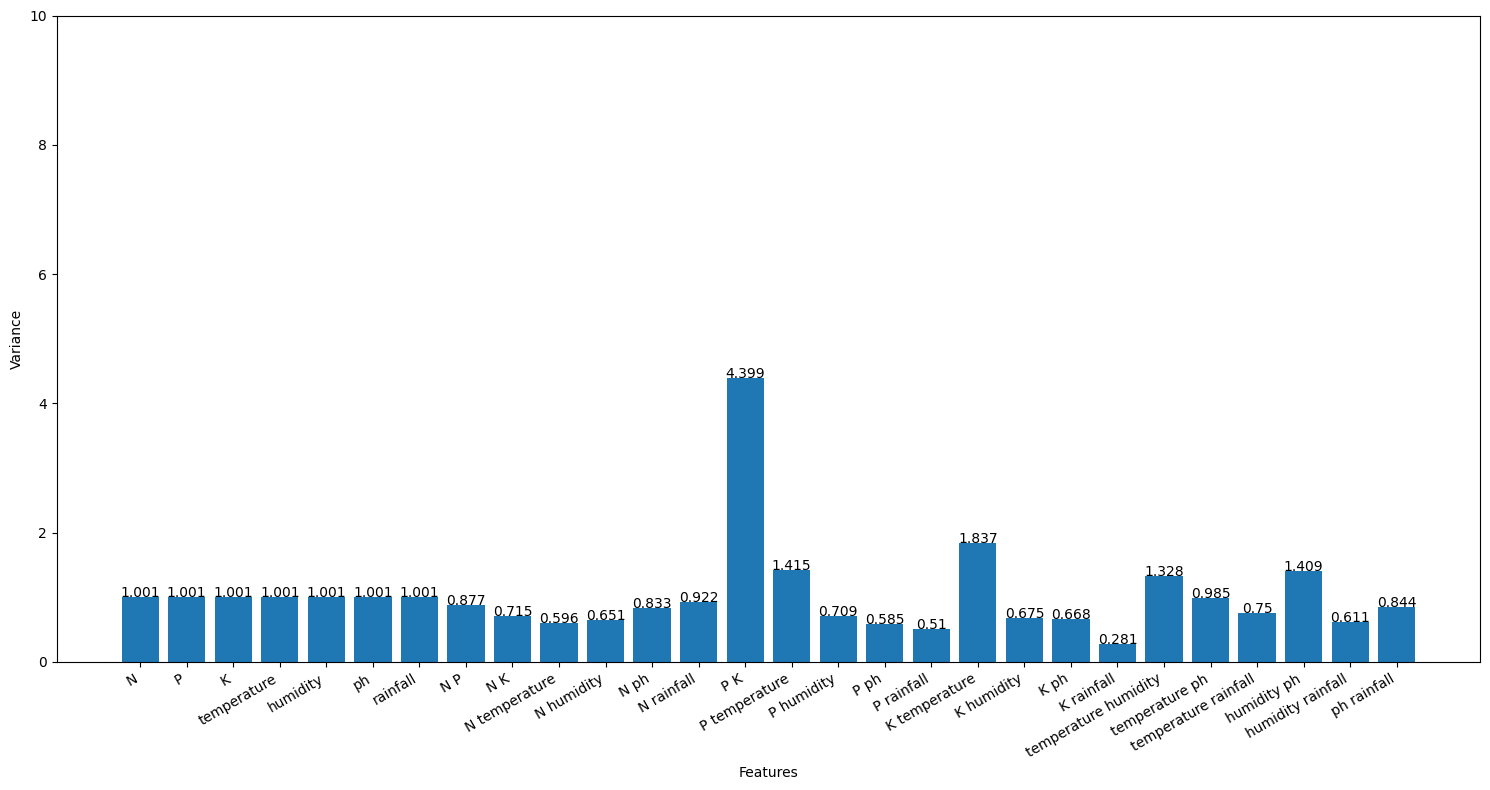

In [133]:
fig, ax = plt.subplots(figsize=(15, 8))

x_label = x_train_poly_df.columns
y_label = x_train_poly_df.var(axis=0)

ax.bar(x_label,y_label, width=0.8)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0,10)

for index, value in enumerate(y_label):
    plt.text(x=index, y=value+0.001, s=str(round(value,3)),ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [134]:
var_x_train = x_train_poly_df.drop(['K rainfall', 'P rainfall'], axis=1)
var_x_test = x_test_poly_df.drop(['K rainfall', 'P rainfall'], axis=1)


dt_var = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_var.fit(var_x_train, y_train) 

y_pred_var = dt_var.predict(var_x_test)
accuracy_var = accuracy_score(y_test, y_pred_var)
print(f'Accuracy: {accuracy_var}')

Accuracy: 0.9818181818181818


In [126]:
estimator = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

rfe_cacr_list = []

x_train1, x_val, y_train1, y_val = train_test_split(x_train_poly_df, y_train, test_size=0.2, stratify=y_train, random_state=42)

for k in range(1,29):
    RFE_selector = RFE(estimator=estimator, n_features_to_select=k, step=1)
    RFE_selector.fit(x_train1, y_train1)

    final_train = RFE_selector.transform(x_train1)
    final_test = RFE_selector.transform(x_val)

    estimator.fit(final_train,y_train1)

    y_pred_sel = estimator.predict(final_test)

    cacr_sel = balanced_accuracy_score(y_val, y_pred_sel)

    rfe_cacr_list.append(cacr_sel)


# selector = RFE(estimator, n_features_to_select = 7  , step=1)

# selector = selector.fit(x_train_poly, y_train)


# feature_names_in_ = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N P',
#        'N K', 'N temperature', 'N humidity', 'N ph', 'N rainfall', 'P K',
#        'P temperature', 'P humidity', 'P ph', 'P rainfall', 'K temperature',
#        'K humidity', 'K ph', 'K rainfall', 'temperature humidity',
#        'temperature ph', 'temperature rainfall', 'humidity ph',
#        'humidity rainfall', 'ph rainfall']

# selector.get_feature_names_out(feature_names_in_)

# selected_features_rfe = x_train_poly_df.columns[selector.support_]
# print(selected_features_rfe)

# final_train_df = x_train_poly_df[selected_features_rfe]
# final_test_df = x_test_poly_df[selected_features_rfe]

In [128]:
# rfe_cacr_list

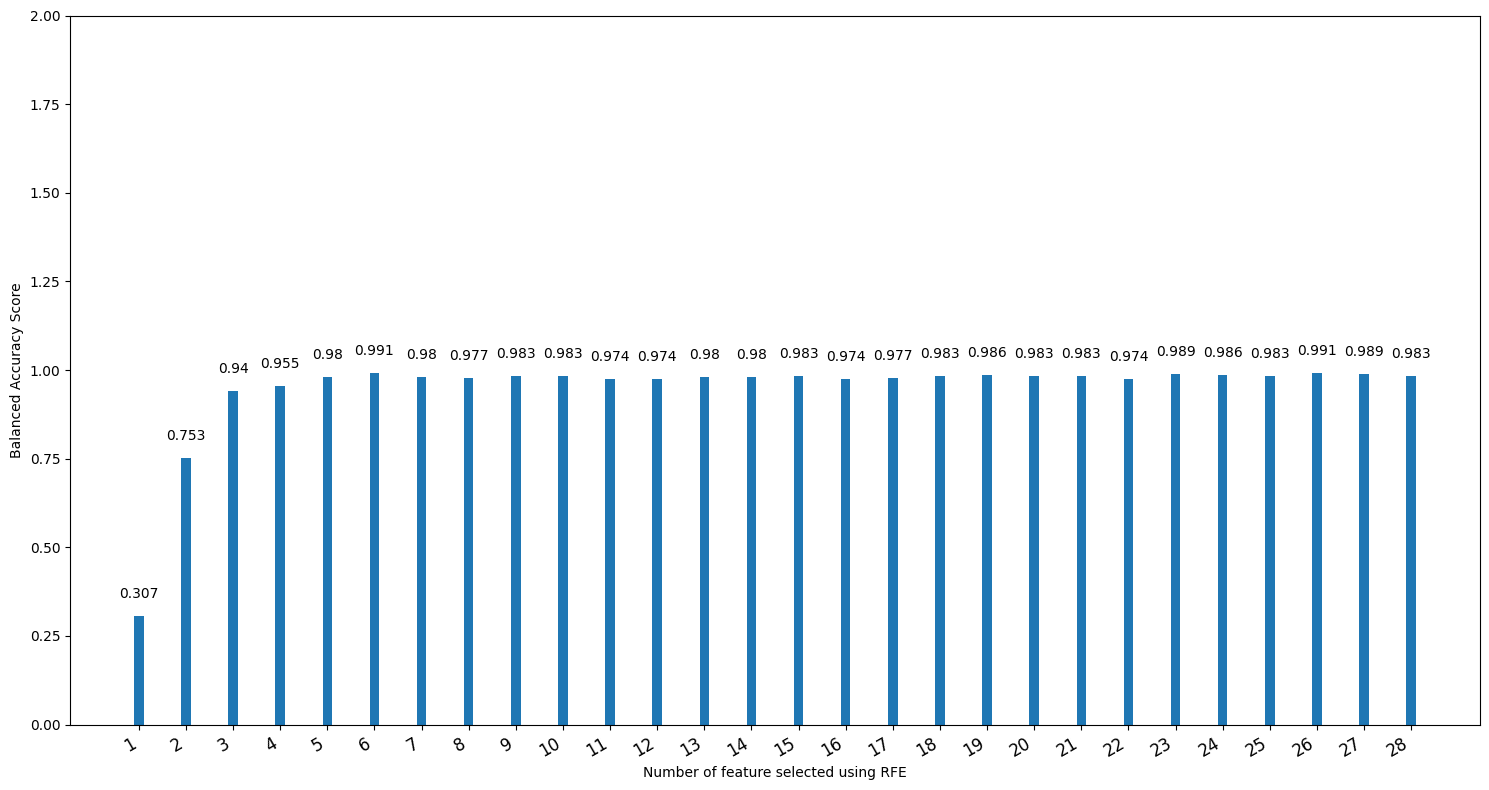

In [129]:
fig, ax = plt.subplots(figsize=(15, 8))

x_label = np.arange(1,29)
y_label = rfe_cacr_list

ax.bar(x_label,y_label, width=0.2)
ax.set_xlabel('Number of feature selected using RFE')
ax.set_ylabel('Balanced Accuracy Score')
ax.set_ylim(0,2)
ax.set_xticks(np.arange(1,29))
ax.set_xticklabels(np.arange(1,29), fontsize = 12)

for i, v in enumerate(y_label):
    plt.text(x=i+1 , y=v+0.05, s=str(round(v,3)),ha='center')

fig.autofmt_xdate()
plt.tight_layout()

In [130]:
RFE_selector = RFE(estimator=estimator, n_features_to_select=23, step=1)
RFE_selector.fit(x_train_poly_df, y_train)


x_train_sel = RFE_selector.transform(x_train_poly_df)
x_test_sel = RFE_selector.transform(x_test_poly_df)

selected_features_mask = RFE_selector.get_support()

selected_features = x_train_poly_df.columns[selected_features_mask]

selected_features


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'N P',
       'N K', 'N temperature', 'N humidity', 'N ph', 'P K', 'P temperature',
       'P humidity', 'P rainfall', 'K temperature', 'K humidity', 'K ph',
       'K rainfall', 'temperature humidity', 'humidity rainfall',
       'ph rainfall'],
      dtype='object')

In [135]:
dt_sel = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

dt_sel.fit(x_train_sel, y_train) 

y_pred_sel = dt_sel.predict(x_test_sel)
accuracy_sel = accuracy_score(y_test, y_pred_sel)
print(f'Accuracy: {accuracy_sel}')

Accuracy: 0.9818181818181818


1. Hyperparameter tunning with gridcv and random cv
2. Different classification result methods - accuracy, cacr, etc